In [1]:
import geopandas as gpd
import pandas as pd

europe_rivers = gpd.read_file("../../Nature/rivers/data/rivers/europe/a00000009.gdbtable")

print(europe_rivers)

        HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0       20000001          0  20000001   0.690000         0.0    5.600000   
1       20000002          0  20000002   4.090000         0.0    7.700000   
2       20000003          0  20000003   5.090000         0.0    9.200000   
3       20000004          0  20000004   3.950000         0.0    9.800000   
4       20000005          0  20000005   1.770000         0.0   12.000000   
...          ...        ...       ...        ...         ...         ...   
938539  20938540          0  20938540   5.140000         0.0   10.700000   
938540  20938541          0  20938541   7.080000         0.0   15.500000   
938541  20938542          0  20938542   3.560000         0.0   11.000000   
938542  20938543          0  20938543   1.340000         0.0    9.400000   
938543  20938544          0  20938544  16.940001         0.0   84.800003   

        CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  \
0       13.

In [2]:
import matplotlib

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

In [12]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

country_shapefiles = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp")
europe = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'Europe']
uk = countrydf.loc[countrydf['SOVEREIGNT'] == 'United Kingdom']
uk = uk.loc[uk['TYPE'] == 'Country']

uk_lakes = gpd.sjoin(lakes, uk, op='intersects')
uk_lakes = lakes.loc[lakes.index.isin(uk_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(europe_rivers, uk_lakes, op='within')
europe_rivers = europe_rivers.loc[~europe_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


          featurecla  scalerank  LABELRANK      SOVEREIGNT SOV_A3  ADM0_DIF  \
6    Admin-0 country          3          3  United Kingdom    GB1         1   
78   Admin-0 country          0          2  United Kingdom    GB1         1   
153  Admin-0 country          0          5  United Kingdom    GB1         1   
172  Admin-0 country          3          3  United Kingdom    GB1         1   
187  Admin-0 country          5          6  United Kingdom    GB1         1   
192  Admin-0 country          5          4  United Kingdom    GB1         1   
205  Admin-0 country          3          6  United Kingdom    GB1         1   
211  Admin-0 country          3          6  United Kingdom    GB1         1   
212  Admin-0 country          3          6  United Kingdom    GB1         1   
214  Admin-0 country          3          5  United Kingdom    GB1         1   
215  Admin-0 country          5          6  United Kingdom    GB1         1   
217  Admin-0 country          5          6  United K

<AxesSubplot:>

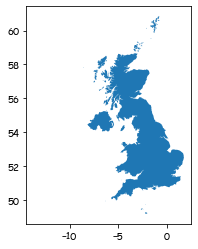

In [10]:
uk.plot()

In [11]:
uk_rivers = gpd.sjoin(europe_rivers, uk, op='within')

C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


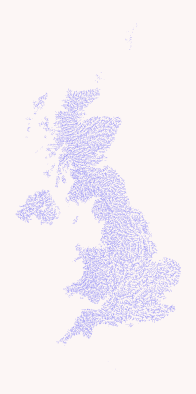

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

uk_rivers.plot(ax=ax, color='blue', lw=0.1)
uk_lakes.plot(ax=ax, color='#FCF6F5FF', alpha=1)

ax.axis('off')
plt.savefig("outputs/eu2.png", dpi=600, bbox_inches='tight')
plt.show()

In [11]:
basins = pd.concat([gpd.read_file("../../Nature/rivers/data/basins/europe/hydrobasins_europe.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/nearest/hydrobasins_neareast.shp")])
print(basins)

     SUB_BAS  TO_BAS  MAJ_BAS      SUB_NAME                          MAJ_NAME  \
0       1004    1006     4001        Miño 2  Spain - Portugal, Atlantic Coast   
1       1005    1006     4001           Sil  Spain - Portugal, Atlantic Coast   
2       1008    -999     4001        Cavado  Spain - Portugal, Atlantic Coast   
3       1013    -999     4001          Mira  Spain - Portugal, Atlantic Coast   
4       2001    2002     4002       Douro 3                             Douro   
..       ...     ...      ...           ...                               ...   
268    18017    -888     6018        Turgay                         Syr Darya   
269    19001   19002     6019           Ile                      Lake Balkash   
270    19002    -888     6019  Lake Balkash                      Lake Balkash   
271    19003    -888     6019      Ysyk-Kol                      Lake Balkash   
272     2002    -999     6002   Gediz River     Mediterranean Sea, East Coast   

     SUB_AREA  MAJ_AREA  LE

In [12]:
basins = gpd.sjoin(basins, europe, op="intersects")

C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [13]:
print(len(basins.MAJ_NAME.unique().tolist()))

57


In [14]:
import pandas as pd
import random

colours_i_like = ['#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', '#848482', '#F3C300',  'blue', '#F38400',
                  '#E68FAC', '#604E97', '#F3C300', '#B3446C', '#C2B280', 
                  '#F6A600', '#882D17', '#E25822', '#8DB600',
                  '#F99379',  '#DCD300', '#F3C300', 
                  '#222222', 'black', 'orange', '#BE0032', '#808000', '#483d8b', '#3cb371', 
                  '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', 
                  '#882D17', '#228B22', '#dc143c', '#875692', '#2f4f4f', '#0000ff',
                  '#ff00ff', '#1e90ff', '#db7093', 'black', '#ff1493', 'darkgreen', 
                  '#ee82ee', '#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', 'orange', '#F3C300',  'blue',]

colours_i_like = ['black', 'blue', '#808000', '#483d8b', '#dc143c',
                  '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', 
                  '#882D17', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff',
                  '#ff00ff', '#1e90ff', '#db7093', '#ff1493', 'darkgreen', 
                  '#ee82ee', '#A1CAF1', 'orange','black', 'blue', '#808000', '#483d8b', '#dc143c',
                  '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', 
                  '#882D17', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff',
                  '#ff00ff', '#1e90ff', '#db7093', '#ff1493', 'darkgreen', 
                  '#ee82ee', '#A1CAF1', 'orange', 'black', 'blue', '#808000', '#483d8b', '#dc143c',
                  '#000080', 'green']

#random.shuffle(colours_i_like)
print(len(colours_i_like))

colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})

57


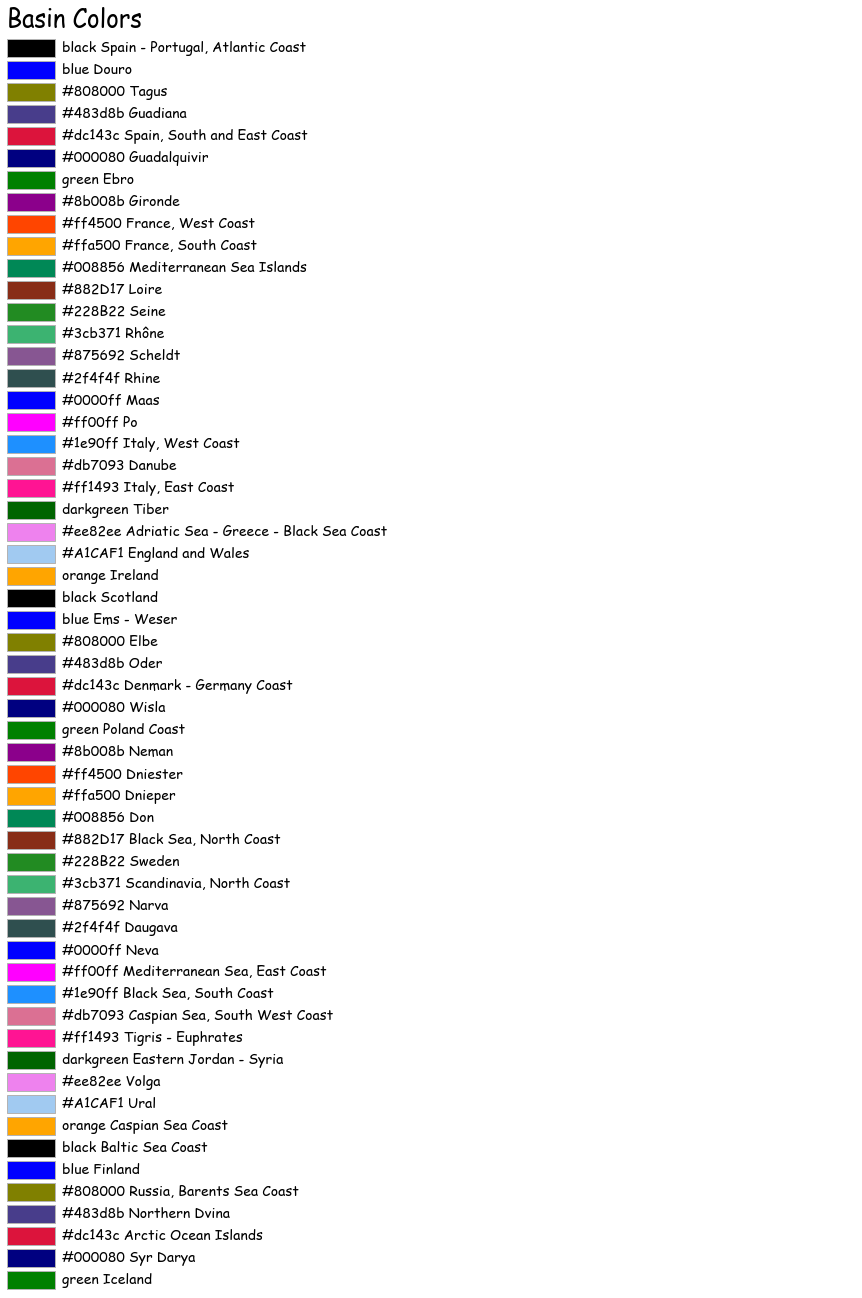

In [15]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colours_i_like)
ncols = 1
nrows = len(colours_i_like)
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colours_i_like, basins.MAJ_NAME.unique().tolist())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )


C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


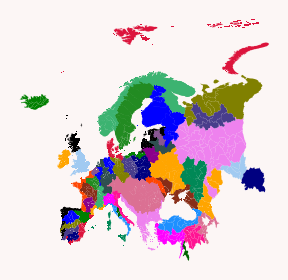

In [16]:
basins = pd.merge(basins, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, column='MAJ_NAME', color=basins['colors'])
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/eu3.png", dpi=600, bbox_inches='tight')

In [17]:
print(basins.columns)
basins = basins.drop(columns=['index_right'])

Index(['SUB_BAS', 'TO_BAS', 'MAJ_BAS', 'SUB_NAME', 'MAJ_NAME', 'SUB_AREA',
       'MAJ_AREA', 'LEGEND', 'geometry', 'index_right',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'basin', 'colors'],
      dtype='object', length=180)


In [18]:
rivers_basins = gpd.sjoin(africa_rivers, basins, op='within')

C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


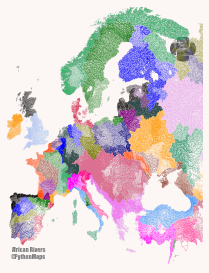

In [19]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=0.1)
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

logo = plt.imread('../../Branding/1.png')
newax = fig.add_axes([0.77, 0.6, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.set_ylim(33, 71)
ax.set_xlim(-10, 45)
ax.axis('off')
plt.savefig("outputs/eu4.png", dpi=600, bbox_inches='tight')
plt.show()

In [20]:
print(rivers_basins.columns)

Index(['HYRIV_ID', 'NEXT_DOWN', 'MAIN_RIV', 'LENGTH_KM', 'DIST_DN_KM',
       'DIST_UP_KM', 'CATCH_SKM', 'UPLAND_SKM', 'ENDORHEIC', 'DIS_AV_CMS',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'basin', 'colors'],
      dtype='object', length=195)


In [21]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.005, max_value: float = 0.6):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'LENGTH_KM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'CATCH_SKM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'DIS_AV_CMS', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'UPLAND_SKM', min_value=0.04, max_value=0.4)


rivers_basins['LW_COMBINED'] = rivers_basins['LW_DIST_UP_KM'] +  rivers_basins['LW_CATCH_SKM']

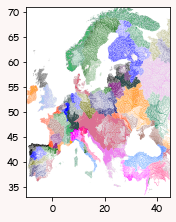

In [25]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
ax.set_ylim(33, 71)
ax.set_xlim(-10, 45)
plt.savefig("outputs/eu5.png", dpi=1000, bbox_inches='tight')
plt.show()

In [23]:
=

SyntaxError: invalid syntax (1763773627.py, line 1)

In [ ]:
df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')

In [ ]:
usa = df.loc[df['ADMIN'] == 'United States of America']

In [ ]:
rivers_basins = rivers_basins.drop(columns=['index_right'])
print(rivers_basins.columns)


In [ ]:
usa_rivers_basins = gpd.sjoin(rivers_basins, usa, op="intersects")
usa_lakes = gpd.sjoin(africa_lakes, usa, op="within")

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

usa_rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
usa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.62, 0.73, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.05, "North American Rivers \n@PythonMaps",
              size=4,
              color='grey',
              transform = ax.transAxes)

ax.axis('off')
ax.set_xlim(-170, -50)
plt.savefig("outputs/raw6.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
=

In [ ]:
import cartopy.crs as ccrs

fig = plt.figure(facecolor='#FCF6F5FF')
ax = plt.axes(projection=ccrs.Mercator())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('#FCF6F5FF')

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'], transform=ccrs.Geodetic())
africa_lakes.plot(ax=ax, color='#FCF6F5FF', transform=ccrs.Geodetic())

#newax = fig.add_axes([0.83, 0.67, 0.1, 0.1], anchor='NE', zorder=-1)
#newax.imshow(logo)
#newax.axis('off')
#txt = ax.text(0.02, 0.0, "South American Rivers \n@PythonMaps",
#              size=6,
#              color='grey',
#              transform = ax.transAxes)

ax.axis('off')
#ax.set_xlim(-170, -50)

plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
for label in ['LW_DIST_UP_KM', 'LW_LENGTH_KM', 'LW_CATCH_SKM', 'LW_DIS_AV_CMS', 'LW_UPLAND_SKM']:
    fig, ax = plt.subplots(facecolor='#FCF6F5FF')
    fig.set_size_inches(7, 3.5)

    rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins[label])
    africa_lakes.plot(ax=ax, color='#FCF6F5FF')

    #newax = fig.add_axes([0.83, 0.67, 0.1, 0.1], anchor='NE', zorder=-1)
    #newax.imshow(logo)
    #newax.axis('off')
    #txt = ax.text(0.02, 0.0, "South American Rivers \n@PythonMaps",
    #              size=6,
    #              color='grey',
    #              transform = ax.transAxes)

    ax.axis('off')
    plt.savefig(f"outputs/{label}.png", dpi=600, bbox_inches='tight')
    plt.show()

In [ ]:
import cartopy.crs as ccrs

fig = plt.figure(facecolor='#FCF6F5FF')
ax = plt.axes(projection=ccrs.Mercator())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('#FCF6F5FF')

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'], transform=ccrs.Geodetic())
africa_lakes.plot(ax=ax, color='#FCF6F5FF', transform=ccrs.Geodetic())

#newax = fig.add_axes([0.83, 0.67, 0.1, 0.1], anchor='NE', zorder=-1)
#newax.imshow(logo)
#newax.axis('off')
#txt = ax.text(0.02, 0.0, "South American Rivers \n@PythonMaps",
#              size=6,
#              color='grey',
#              transform = ax.transAxes)

#ax.axis('off')
plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 7)

ax1 = plt.subplot(1,3,1)
rivers_basins.plot(ax=ax1, color='blue', lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax1, color='#FCF6F5FF')
ax1.set_title("Discharge", fontfamily='fantasy')
ax1.axis('off')

ax2 = plt.subplot(1,3,2)
rivers_basins.plot(ax=ax2, color='blue', lw=rivers_basins['LW_LENGTH_KM'])
africa_lakes.plot(ax=ax2, color='#FCF6F5FF')
ax2.set_title("Width", fontfamily='fantasy')
ax2.axis('off')

ax3 = plt.subplot(1,3,3)
rivers_basins.plot(ax=ax3, color='blue', lw=rivers_basins['LW_CATCH_SKM'])
africa_lakes.plot(ax=ax3, color='#FCF6F5FF')
ax3.set_title("Depth", fontfamily='fantasy')
ax3.axis('off')

plt.savefig("outputs/raw4.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color='blue', lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color='blue', lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/raw6.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
africa_rivers = gpd.read_file("../../Nature/rivers/data/rivers/africa/a00000009.gdbtable")

print(africa_rivers)

In [ ]:
tmp_df = africa_rivers.loc[africa_rivers['ORD_FLOW'] < 8]

In [ ]:
leftSpan = np.amax(tmp_df['DIST_UP_KM']) - np.amin(tmp_df['DIST_UP_KM'])
rightSpan = 0.7 - 0.01
valueScaled = (tmp_df['DIST_UP_KM'] - np.amin(tmp_df['DIST_UP_KM'])) / leftSpan
tmp_df['lw'] = 0.01 + (valueScaled * rightSpan)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

tmp_df.plot(ax=ax, color='blue', lw=tmp_df['lw'])
africa_lakes.plot(ax=ax, color='blue', alpha=1)

ax.axis('off')

plt.savefig("outputs/thumbnail.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

tmp_df.plot(ax=ax, color='blue', lw=tmp_df['lw'])
africa_lakes.plot(ax=ax, color='blue', alpha=1)

ax.axis('off')
ax.set_ylim(-20, 20)
plt.savefig("outputs/thumbnail.png", dpi=600, bbox_inches='tight')
plt.show()